### Project 06

* Knock-in payoff is given as below

$$F(S) = exp(-rT)\cdot 1000\cdot I(S_T > K)\cdot I(min_{1 \leq k \leq m} S (t_k) < H) $$

In [2]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

* GBM class

In [3]:
class GBM():
    def __init__(self, Drift, Vol, InitState):
        self.Drift = Drift #scalar
        self.Vol = Vol #scalar
        self.InitState = InitState
        self.Mu = lambda x, t: Drift * x
        self.Sigma = lambda x, t: Vol * x
        
    def _Wn(self,T,m):
        t=np.linspace(0,T,m+1)
        Wh=np.zeros(m+1)
        for i in range(m):
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
        return Wh
        
    def _explicit_sol_(self, t, W_t):
        x0 = self.InitState
        b = self.Drift
        sigma = self.Vol
        return x0 * np.exp((b - sigma**2/2.) * t + sigma * W_t)

* Main function

The final price is  0.5569938794785492


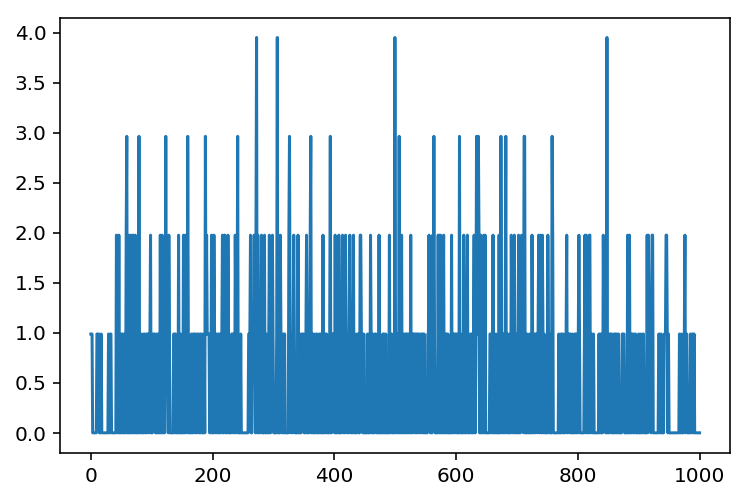

The mean is  0.5569938794785492
The standard is  0.4967410771236707
The 95 percent confidence interval is between -0.436 and 1.550


In [10]:
if __name__ == "__main__":
    r=0.05
    vol=0.15
    S0=95
    iGBM = GBM(r,vol,S0)
    T=0.25
    m=50
    H=85
    K=96
    k=1000
    n=1000

    Price=np.zeros(n)
    for j in range(n):
        payoff=0
        for i in range(k):
            W_t=iGBM._Wn(T,m)
            t=np.linspace(0,T,m+1)
            St=iGBM._explicit_sol_(t,W_t)
 
            if St[-1]>K and min(St)<H:
                payoff=payoff+1000
                #print(payoff)
        #price=payoff/k
        Price[j]=payoff/k*np.exp(-r*T)
        #print(j)
    print('The final price is ',np.mean(Price))
    plt.plot(np.linspace(0,n,n),Price)
    plt.show()

    mean=np.mean(Price)
    print('The mean is ',mean)
    std=np.sqrt(np.mean((Price-np.mean(Price)**2)))
    print('The standard is ',std)
    print('The 95 percent confidence interval is between %4.3f and %4.3f' %(mean-2*std,mean+2*std))